In [2]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

C:\Users\jjong\AppData\Local\Temp\ipykernel_16088\2441446269.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [4]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)

In [6]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

##### KNN Classification

- 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
- k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

In [8]:
# iris data

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [15]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.975
Scores of Test Data : 1.0


In [17]:
model.fit(X_train_scale, y_train)
print(f'Scores of Training Data : {model.score(X_train_scale, y_train)}')
print(f'Scores of Test Data : {model.score(X_test_scale, y_test)}')

Scores of Training Data : 0.9666666666666667
Scores of Test Data : 0.9333333333333333


In [18]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.4s finished


{'fit_time': array([0.        , 0.00100136, 0.        , 0.        , 0.00099969]),
 'score_time': array([0.00239468, 0.00239301, 0.00239468, 0.00239301, 0.00199938]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [19]:
param_grid = [{'n_neighbors' : [3, 5, 7],
               'weights' : ['uniform', 'distance'],
               'algorithm':['ball_tree','kd_tree','brute']}]

In [22]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, n_jobs=multiprocessing.cpu_count(), verbose=True)

In [23]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=12,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [32]:
print(f'Best Parameters : {gs.best_params_}')
print(f'Best Scores : {gs.best_score_}')

Best Parameters : {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
Best Scores : 0.9800000000000001


In [46]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_countors(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [34]:
tsne = TSNE(n_components=2) # 두개의 feature로 
X_comp = tsne.fit_transform(X)

In [35]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df.head()

,0,1,Target
0,-23.875437,-1.430589,0
1,-21.332832,-2.522965,0
2,-21.183956,-1.316485,0
3,-20.842545,-1.611920,0
4,-23.845785,-0.945733,0


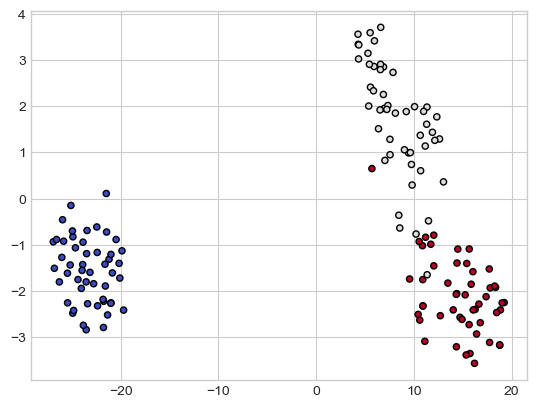

In [38]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [39]:
model = KNeighborsClassifier()
model.fit(X_comp, y)

KNeighborsClassifier()

In [40]:
predict = model.predict(X_comp)

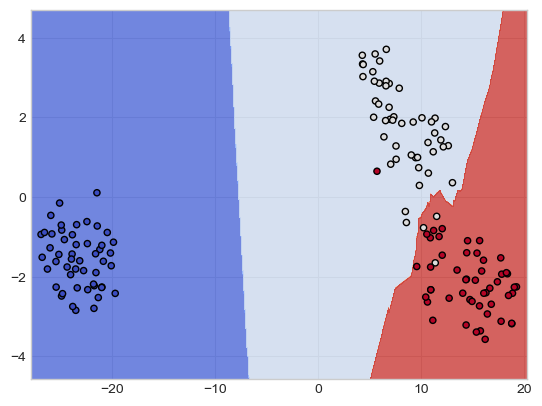

In [47]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_countors(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

##### 유방암 데이터

In [49]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

In [50]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [51]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.033230,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.15510,0.14590,0.09975,0.2948,0.08452,0
1,10.03,21.28,63.19,307.3,0.08117,0.03912,0.00247,0.005159,0.1630,0.06439,...,28.94,69.92,376.3,0.1126,0.07094,0.01235,0.02579,0.2349,0.08061,1
2,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.054390,0.1720,0.06419,...,26.02,107.30,740.4,0.1610,0.42250,0.50300,0.22580,0.2807,0.10710,0
3,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.063670,0.2196,0.07950,...,32.82,91.76,508.1,0.2184,0.93790,0.84020,0.25240,0.4154,0.14030,0
4,14.87,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.089230,0.2157,0.06768,...,27.37,127.10,1095.0,0.1878,0.44800,0.47040,0.20270,0.3585,0.10650,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.100900,0.1907,0.06049,...,21.32,150.60,1567.0,0.1679,0.50900,0.73450,0.23780,0.3799,0.09185,0
451,15.75,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.124200,0.2375,0.07603,...,24.17,119.40,915.3,0.1550,0.50460,0.68720,0.21350,0.4245,0.10500,0
452,12.23,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.041070,0.1979,0.06013,...,28.36,92.15,638.4,0.1429,0.20420,0.13770,0.10800,0.2668,0.08174,1
453,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.028750,0.1734,0.05865,...,22.02,79.93,462.0,0.1190,0.16480,0.13990,0.08476,0.2676,0.06765,1


In [58]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_data = scaler.transform(X_test)

In [55]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
print(f'Scores of Training Data : {model.score(X_train, y_train)}')
print(f'Scores of Test Data : {model.score(X_test, y_test)}')

Scores of Training Data : 0.9494505494505494
Scores of Test Data : 0.9035087719298246


In [59]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [61]:
print(f'Scores of Training Data : {model.score(X_train_scale, y_train)}')
print(f'Scores of Test Data : {model.score(X_test_data, y_test)}')

Scores of Training Data : 0.9802197802197802
Scores of Test Data : 0.9649122807017544


In [62]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [63]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.9s finished


{'fit_time': array([0.00200057, 0.0021553 , 0.00099993, 0.0010004 , 0.0010004 ]),
 'score_time': array([0.08359861, 0.08464813, 0.08159876, 0.08459878, 0.08359742]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [64]:
pipe = Pipeline(
    [('scaler',StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [68]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights':['uniform','distance'],
               'model__algorithm': ['ball_tree', 'kd_tree','brute']}]

In [69]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [70]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=12,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [71]:
print(f'Best estimator : {gs.best_estimator_}')
print(f'Best score : {gs.best_score_}')

Best estimator : Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])
Best score : 0.9701288619779538


In [72]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [78]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,42.104282,-12.535738,0
1,42.269810,-9.850520,0
2,37.661800,-9.865570,0
3,-17.582714,1.816186,0
4,36.543030,-7.761000,0
...,...,...,...
564,43.790070,-9.225799,0
565,38.597885,-9.270696,0
566,22.164120,-2.738216,0
567,40.147724,-9.924445,0


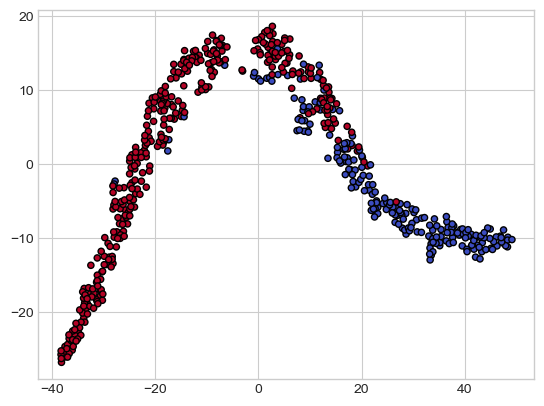

In [79]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
            c=y,
            cmap=plt.cm.coolwarm,
            s=20,
            edgecolors='k');

In [80]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

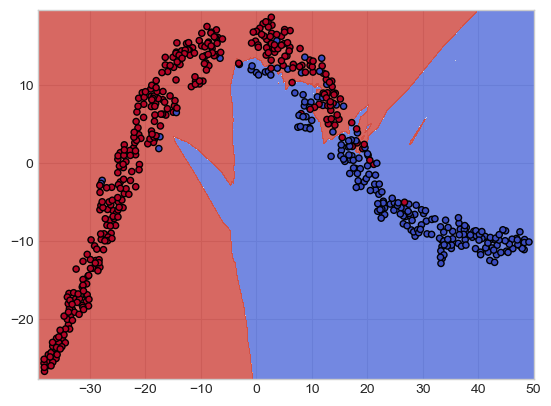

In [82]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_countors(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')